In [1]:
import numpy as np, matplotlib.pyplot as plt, midynet, pathlib
from midynet.utility import display
from itertools import product

In [2]:

display.setup_dir("./")

paths_to_figures = ["."]
paths_to_figures = list(map(pathlib.Path, paths_to_figures))

def plogp(p):
    return -p*np.log(p)

def hx(q, r, s):
    assert r.shape == s.shape
    q = q * np.ones_like(r)
    px, py, pz = q * r, q * (1 - r) + (1 - q) * s, (1 - q) * (1 - s)
    return plogp(px) + plogp(py) + plogp(pz)

def hxg(q, r, s):
    assert r.shape == s.shape
    q = q * np.ones_like(r)
    return q * (plogp(r) + plogp(1 - r)) + (1 - q) * (plogp(s) + plogp(1 - s))


def hg(q, r, s):
    assert r.shape == s.shape
    q = q * np.ones_like(r)
    return plogp(q) + plogp(1 - q)


def hgx(q, r, s):
    return hg(q,r,s) + hxg(q,r,s) - hx(q,r,s)

def mi(q, r, s):
    return hx(q,r,s) - hxg(q,r,s)

def recon(q,r,s):
    return mi(q,r,s) / hg(q,r,s)

def pred(q,r,s):
    return mi(q,r,s) / hx(q,r,s)


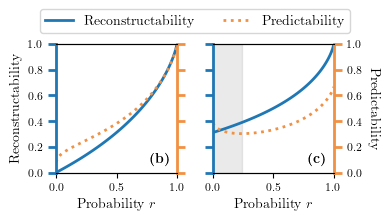

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(4, 2), sharey=False, sharex=True)

r = np.linspace(0.00001, 0.9999, 100)
q = np.ones_like(r)*0.5
s = np.ones_like(r)*0.999
rec, pre = recon(q, r, s), pred(q, r, s)
duality = np.argmin(pre)
axx = np.array(list(map(lambda a: a.twinx(), ax)))
ax[0].plot(r, rec, linestyle="-", linewidth=2, color=display.med_colors["blue"], marker="None")
axx[0].plot(r, pre, linestyle="dotted", linewidth=2, color=display.med_colors["orange"], marker="None")
ax[0].axvspan(0, r[duality], color=display.light_colors["grey"], alpha=0.2)
ax[0].set_xlim([0, 1])
ax[0].set_ylim([0, 1])
axx[0].set_ylim([0, 1])

r = np.linspace(0.00001, 0.9999, 100)
q = np.ones_like(r)*0.5
s = np.ones_like(r)*0.5
rec, pre = recon(q, r, s), pred(q, r, s)
duality = np.argmin(pre)
ax[1].plot(r, rec, linestyle="-", linewidth=2, color=display.med_colors["blue"], marker="None")
axx[1].plot(r, pre, linestyle="dotted", linewidth=2, color=display.med_colors["orange"], marker="None")
ax[1].axvspan(0, r[duality], color=display.light_colors["grey"], alpha=0.2)
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 1])
axx[1].set_ylim([0, 1])

ax[0].set_xlabel("Probability $r$", fontsize=display.fontsizes["label"])
ax[1].set_xlabel("Probability $r$", fontsize=display.fontsizes["label"])
ax[0].set_ylabel("Reconstructability", fontsize=display.fontsizes["label"])
axx[1].set_ylabel(
    "Predictability", 
    fontsize=display.fontsizes["label"], 
    rotation=-90,
    rotation_mode="anchor", 
    va="bottom"
)
axx[0].set_yticklabels([])
ax[1].set_yticklabels([])

axx[0].spines['left'].set_color(display.med_colors["blue"])
axx[0].spines['left'].set_linewidth(2)
axx[0].spines['right'].set_color(display.med_colors["orange"])
axx[0].spines['right'].set_linewidth(2)
axx[0].tick_params(axis='y', color=display.med_colors["orange"], length=6, width=2)
ax[0].tick_params(axis='y', color=display.med_colors["blue"], length=6, width=2)
ax[0].tick_params(axis='both', labelsize=display.fontsizes["tick"])
axx[0].tick_params(axis='both', labelsize=display.fontsizes["tick"])

axx[1].spines['left'].set_color(display.med_colors["blue"])
axx[1].spines['left'].set_linewidth(2)
axx[1].spines['right'].set_color(display.med_colors["orange"])
axx[1].spines['right'].set_linewidth(2)
axx[1].tick_params(axis='y', color=display.med_colors["orange"], length=6, width=2)
ax[1].tick_params(axis='y', color=display.med_colors["blue"], length=6, width=2)
ax[1].tick_params(axis='both', labelsize=display.fontsizes["tick"])
axx[1].tick_params(axis='both', labelsize=display.fontsizes["tick"])

# handles = [
#     display.get_label_line(r"$U(G|X)$", style=ax[0].get_lines()[0]),
#     display.get_label_line(r"$U(X|G)$", style=ax[0].get_lines()[1]),
# ]
# ax[0].legend(handles=handles, loc="upper left", fontsize=display.fontsizes["legend"])
display.Label.clear()
display.Label.counter += 1
display.Label.plot(ax[0], loc="bottom right")
display.Label.plot(ax[1], loc="bottom right")
handles = [
    display.get_label_line("Reconstructability", style=ax[0].get_lines()[0], marker="None"),
    display.get_label_line("Predictability", style=axx[0].get_lines()[0], marker="None"),
]
lg = fig.legend(handles=handles, loc="center", fontsize=display.fontsizes["label"], ncol=2, bbox_to_anchor=(0.5, 1.02))
fig.tight_layout()


for p, fmt in product(paths_to_figures, ["png", "pdf", "svg"]):
    fig.savefig(p / fmt / f"simple-example-bc.{fmt}", bbox_extra_artists=(lg,), bbox_inches='tight')


